In [1]:
# Add repo root to sys.path so the package can be imported in-kernel
import sys
from pathlib import Path
# repo_root should point to the repository root (parent of RTD_Calibration_VGP)
repo_root = Path('..').resolve().parent if (Path('..').resolve().name == 'RTD_Calibration_VGP') else Path('..').resolve()
# ensure the repository root is the parent that contains RTD_Calibration_VGP
if (repo_root / 'RTD_Calibration_VGP').exists():
    sys.path.insert(0, str(repo_root))
    print('Inserted repo root into sys.path:', repo_root)
else:
    # fallback: insert the immediate parent and warn
    sys.path.insert(0, str(Path('..').resolve()))
    print('Warning: expected repo layout not found; inserted', Path('..').resolve(), 'into sys.path')

# Import local modules via package namespace
from RTD_Calibration_VGP.src.logfile import Logfile
from RTD_Calibration_VGP.src.run import Run
from RTD_Calibration_VGP.src.set import Set
import pandas as pd

# Read the logfile from repo data folder (guard if missing)
logfile_path = (repo_root / 'RTD_Calibration_VGP' / 'data' / 'LogFile.csv').resolve() if (repo_root / 'RTD_Calibration_VGP').exists() else (repo_root / 'data' / 'LogFile.csv').resolve()
if not logfile_path.exists():
    print(f'Warning: logfile not found at {logfile_path}. Create or provide RTD_Calibration_VGP/data/LogFile.csv before running data processing cells.')
    logfile_df = pd.DataFrame()
else:
    logfiles = Logfile(filepath=str(logfile_path))
    logfile_df = logfiles.log_file

# Select sets to process - todos los sets de primera ronda
# Según config/sensors.yaml, los sets de ronda 1 son: 1-48, 59, 60
selected_sets = list(range(1, 49)) + [59, 60]  # Todos los sets de primera ronda

# Try to use the external YAML config if available
config_path = (repo_root / 'RTD_Calibration_VGP' / 'config' / 'config.yaml').resolve()
if config_path.exists():
    print(f'Using sensors config: {config_path}')
    set_instance = Set(logfile=logfile_df, config_path=str(config_path))
else:
    set_instance = Set(logfile=logfile_df)

# If logfile_df is empty the following calls will be no-ops or produce warnings
set_instance.group_runs_by_set(selected_sets=selected_sets)
set_instance.calculate_offsets_and_rms(selected_sets=selected_sets)
# Use outputs/ directory for generated plots
set_instance.offset_repeatability(selected_sets=selected_sets, ref=2, save_dir='outputs/plot_global_means')

# Weighted mean offsets and errors
calibration_constants, calibration_errors = set_instance.calculate_weighted_mean_offsets(selected_sets=selected_sets)

print('Set processing complete. You can now run the plotting cells to generate figures.')


Inserted repo root into sys.path: /Users/vicky/Desktop/rtd-calibration-ana
CSV file loaded successfully from '/Users/vicky/Desktop/rtd-calibration-ana/RTD_Calibration_VGP/data/LogFile.csv'.

Processing CalibSetNumber: 1.0
    Excluded: 20220201_ln2_r48176_r48177_487178-48189_1 (marked as 'BAD' in Selection)
    Excluded: 20220201_ln2_r48176_r48177_487178-48189_2 (marked as 'BAD' in Selection)
    Excluded: 20220201_ln2_r48176_r48177_487178-48189_3 (marked as 'BAD' in Selection)
    Excluded: 20220201_ln2_r48176_r48177_487178-48189_4 (marked as 'BAD' in Selection)
    Excluded: 20220203_ln2_r48176_r48177_48178-48189_3 (marked as 'BAD' in Selection)
    Excluded: 20220207_ln2_r48176_r48177_48178-48189_1_pre (contains 'pre' or 'st')
Temperature file found: /Users/vicky/Desktop/rtd-calibration-ana/RTD_Calibration_VGP/data/temperature_files/RTD_Calibs/CalSetN_1/20220207_ln2_r48176_r48177_48178-48189_1.txt
Temperature file processed successfully: /Users/vicky/Desktop/rtd-calibration-ana/RTD_

/Users/vicky/Desktop/rtd-calibration-ana/RTD_Calibration_VGP/src/set.py:812: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[idx].legend(fontsize=8, loc="upper left", ncol=1)


Plot saved to: outputs/plot_global_means/offset_repeatability_set_30.png

Processing CalibSetNumber: 31
OK: Set 31: Using dynamic references from raised sensors in channels [3, 9]
  [Sensor Ch 1 vs Ref Ch 3 | Run 1] Mean: 253.407 mK, Std: 0.741 mK
  [Sensor Ch 1 vs Ref Ch 3 | Run 2] Mean: 250.278 mK, Std: 0.339 mK
  [Sensor Ch 1 vs Ref Ch 3 | Run 3] Mean: 245.080 mK, Std: 0.316 mK
  [Sensor Ch 1 vs Ref Ch 3 | Run 4] Mean: 245.703 mK, Std: 0.485 mK
  [Sensor Ch 2 vs Ref Ch 3 | Run 1] Mean: 227.953 mK, Std: 0.638 mK
  [Sensor Ch 2 vs Ref Ch 3 | Run 2] Mean: 230.148 mK, Std: 0.260 mK
  [Sensor Ch 2 vs Ref Ch 3 | Run 3] Mean: 228.734 mK, Std: 0.258 mK
  [Sensor Ch 2 vs Ref Ch 3 | Run 4] Mean: 229.655 mK, Std: 0.345 mK
  [Sensor Ch 3 vs Ref Ch 9 | Run 1] Mean: -284.920 mK, Std: 0.738 mK
  [Sensor Ch 3 vs Ref Ch 9 | Run 2] Mean: -287.318 mK, Std: 0.342 mK
  [Sensor Ch 3 vs Ref Ch 9 | Run 3] Mean: -283.702 mK, Std: 0.319 mK
  [Sensor Ch 3 vs Ref Ch 9 | Run 4] Mean: -286.864 mK, Std: 0.626 mK


Processing 50 sets.
Set 1: len sensor_names=11, len global_means=11
  First sensor_name: '48178' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(-8.43845477790274) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 2: len sensor_names=10, len global_means=10
  First sensor_name: '48190' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(830.6866205434924) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 3: len sensor_names=9, len global_means=9
  First sensor_name: '48060' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(-66.35545269405011) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 4: len sensor_names=9, len global_means=9
  First sensor_name: '48480' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(-13.924798414992452) (type: <class 'numpy.float64'>)
  All glob

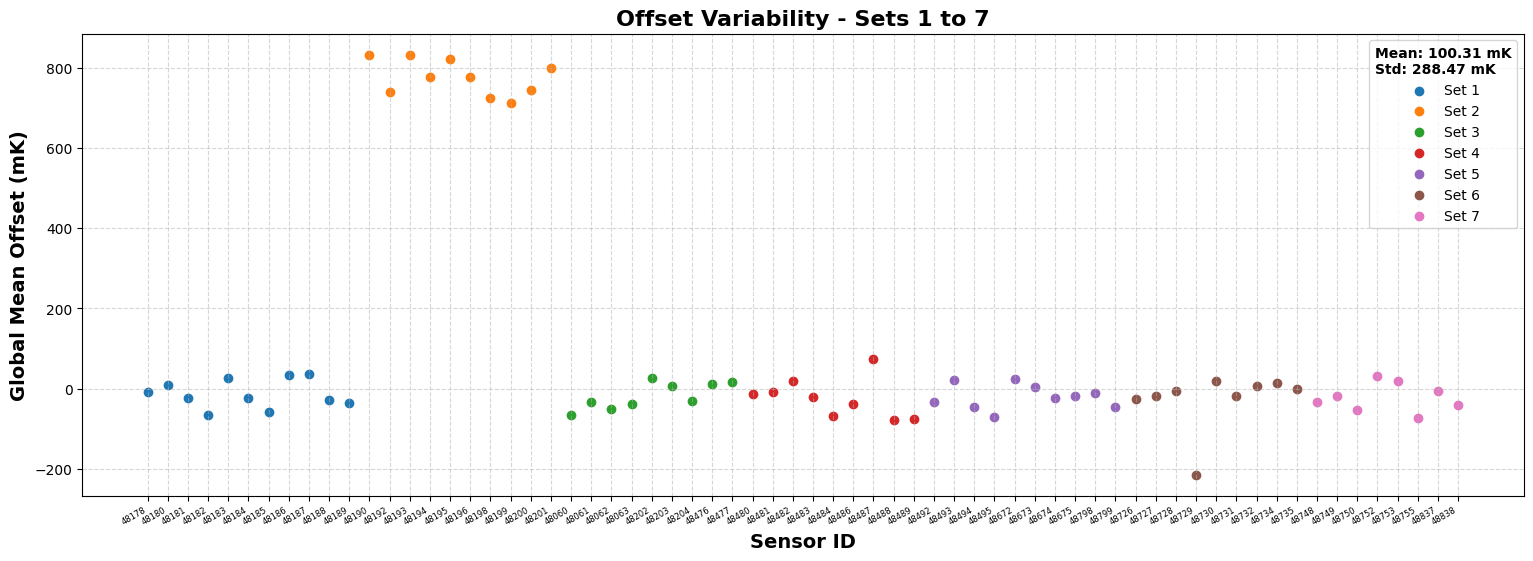

Set 8: len sensor_names=9, len global_means=9
  First sensor_name: '48840' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(69.44846724236673) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 9: len sensor_names=11, len global_means=11
  First sensor_name: '48852' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(176.30075072459772) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 10: len sensor_names=11, len global_means=11
  First sensor_name: '48864' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(510.161061460056) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 11: len sensor_names=11, len global_means=11
  First sensor_name: '48876' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(474.5711616109265) (type: <class 'numpy.float64'>)
  All global_mean types: {'fl

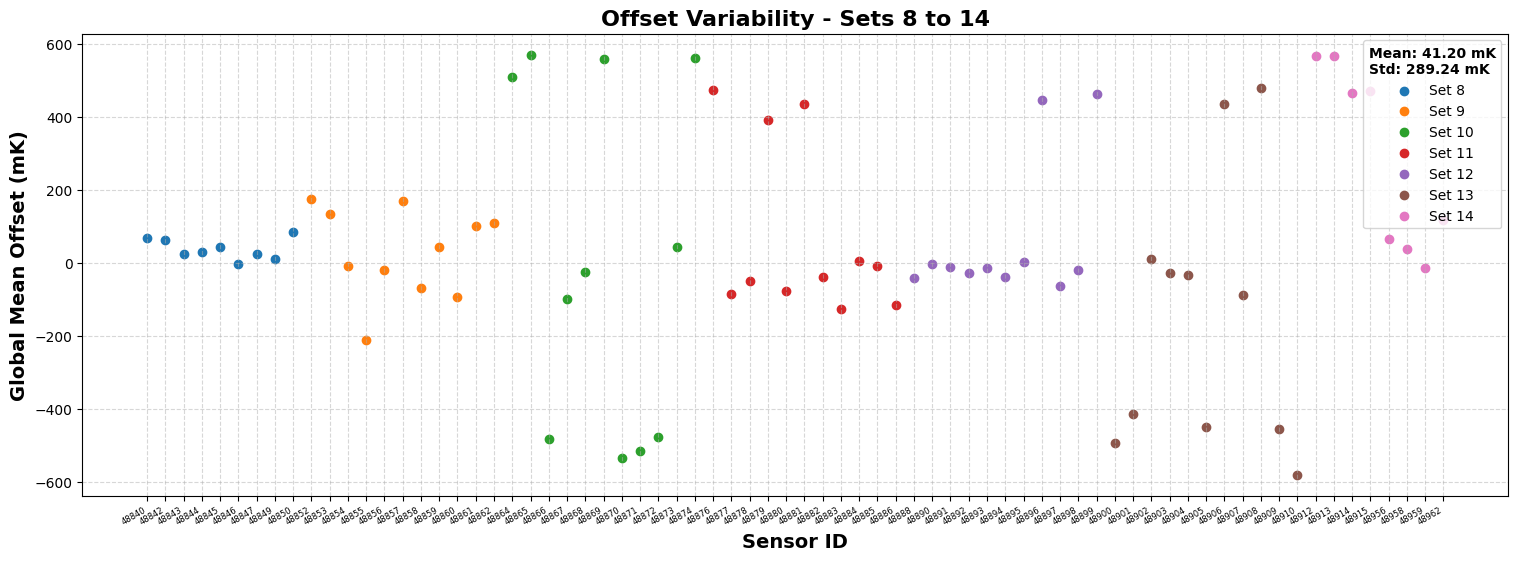

Set 15: len sensor_names=9, len global_means=9
  First sensor_name: '48516' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(518.9729542055697) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 16: len sensor_names=9, len global_means=9
  First sensor_name: '49101' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(549.3242143580708) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 17: len sensor_names=9, len global_means=9
  First sensor_name: '49113' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(-402.586976713226) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 18: len sensor_names=10, len global_means=10
  First sensor_name: '49125' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(46.25990699789376) (type: <class 'numpy.float64'>)
  All global_mean types: {'floa

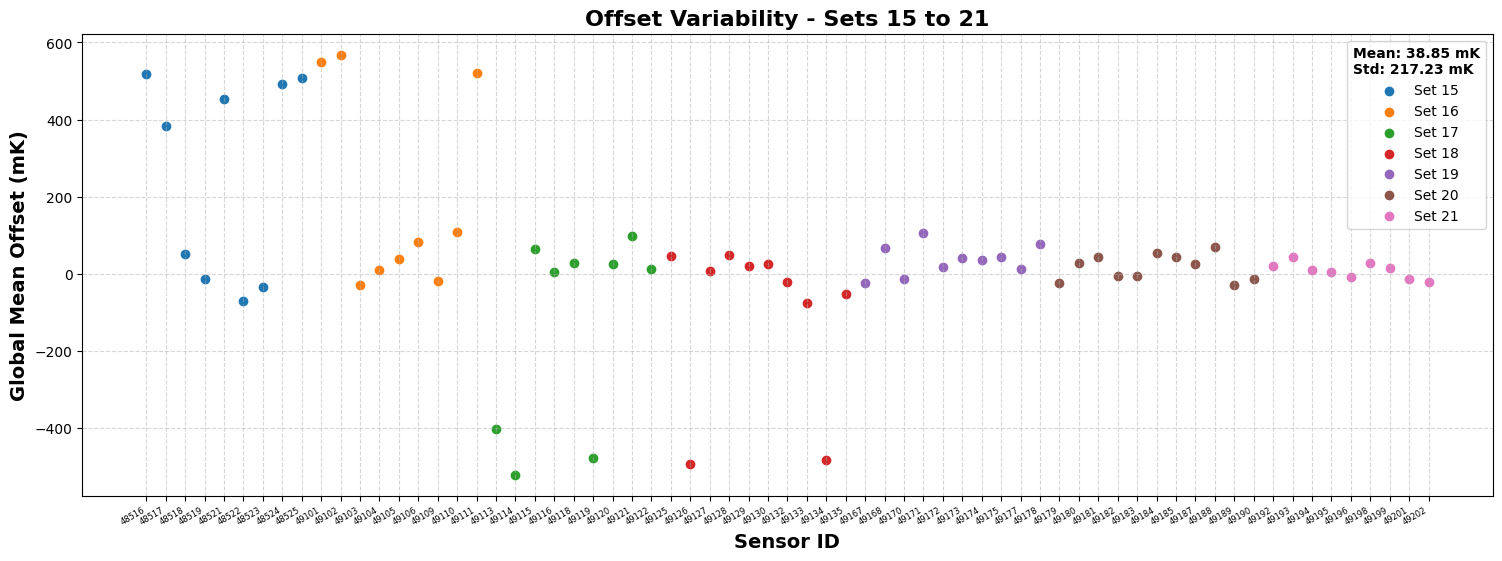

Set 22: len sensor_names=9, len global_means=9
  First sensor_name: '49203' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(-16.361026120233838) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 23: len sensor_names=7, len global_means=7
  First sensor_name: '49227' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(8.802081892817542) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 24: len sensor_names=10, len global_means=10
  First sensor_name: '49238' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(43.43578343792494) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 25: len sensor_names=9, len global_means=9
  First sensor_name: '49250' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(5.353061249734044) (type: <class 'numpy.float64'>)
  All global_mean types: {'fl

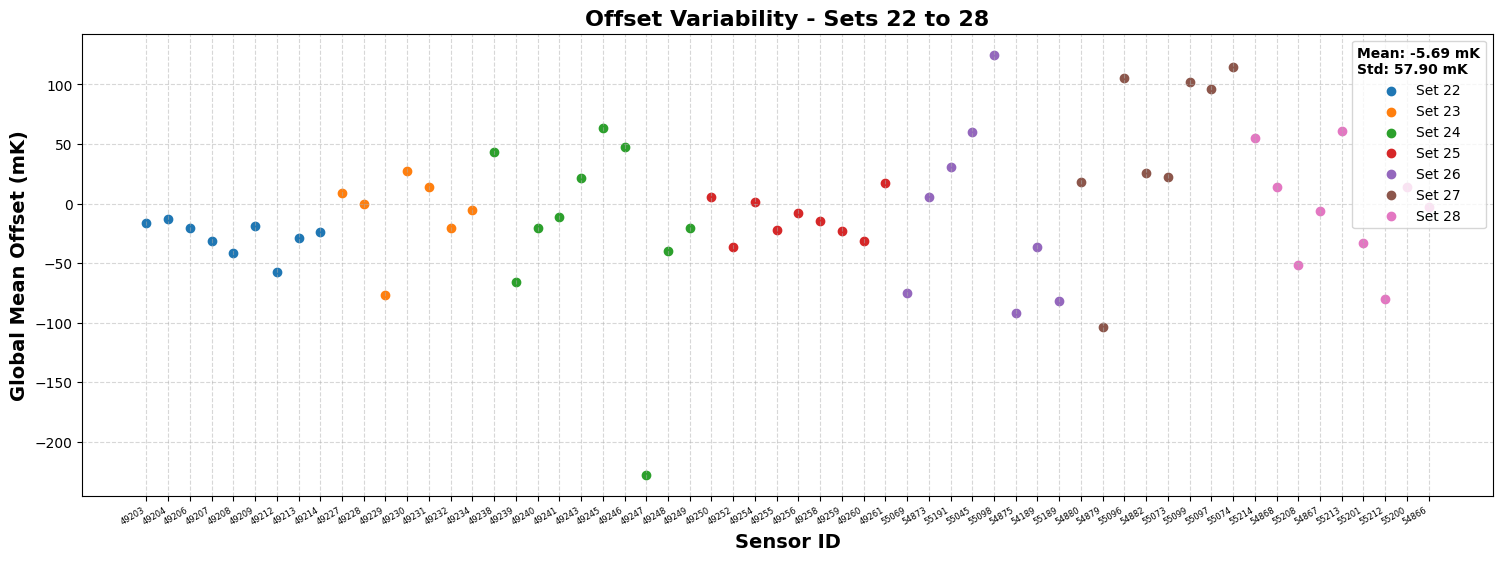

Set 29: len sensor_names=10, len global_means=10
  First sensor_name: '55264' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(59.99332214017241) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 30: len sensor_names=7, len global_means=7
  First sensor_name: '55254' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(-111.62087532202804) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 31: len sensor_names=10, len global_means=10
  First sensor_name: '55179' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(229.39273056790006) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 32: len sensor_names=10, len global_means=10
  First sensor_name: '55247' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(-43.748213067542714) (type: <class 'numpy.float64'>)
  All global_mean type

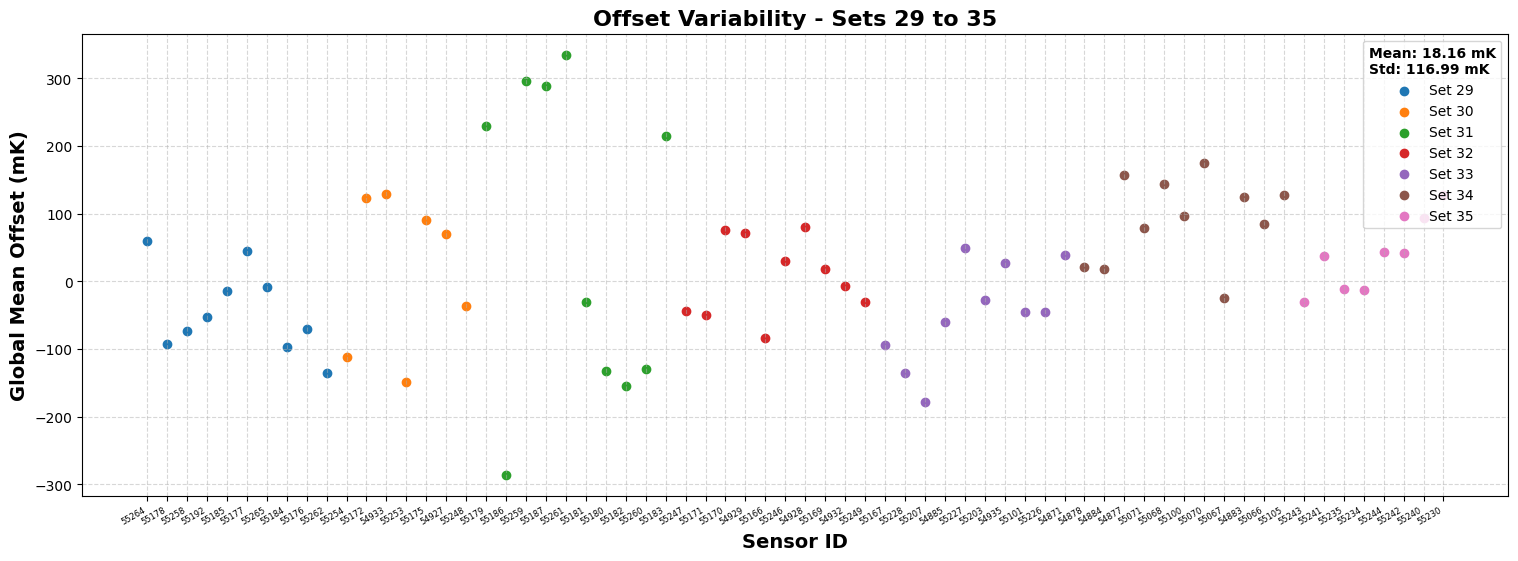

Set 36: len sensor_names=10, len global_means=10
  First sensor_name: '55037' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(48.58655364327729) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 37: len sensor_names=9, len global_means=9
  First sensor_name: '55063' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(-10.88730236355016) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 38: len sensor_names=10, len global_means=10
  First sensor_name: '55218' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(35.93507613274094) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 39: len sensor_names=11, len global_means=11
  First sensor_name: '55238' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(102.02864675880144) (type: <class 'numpy.float64'>)
  All global_mean types: 

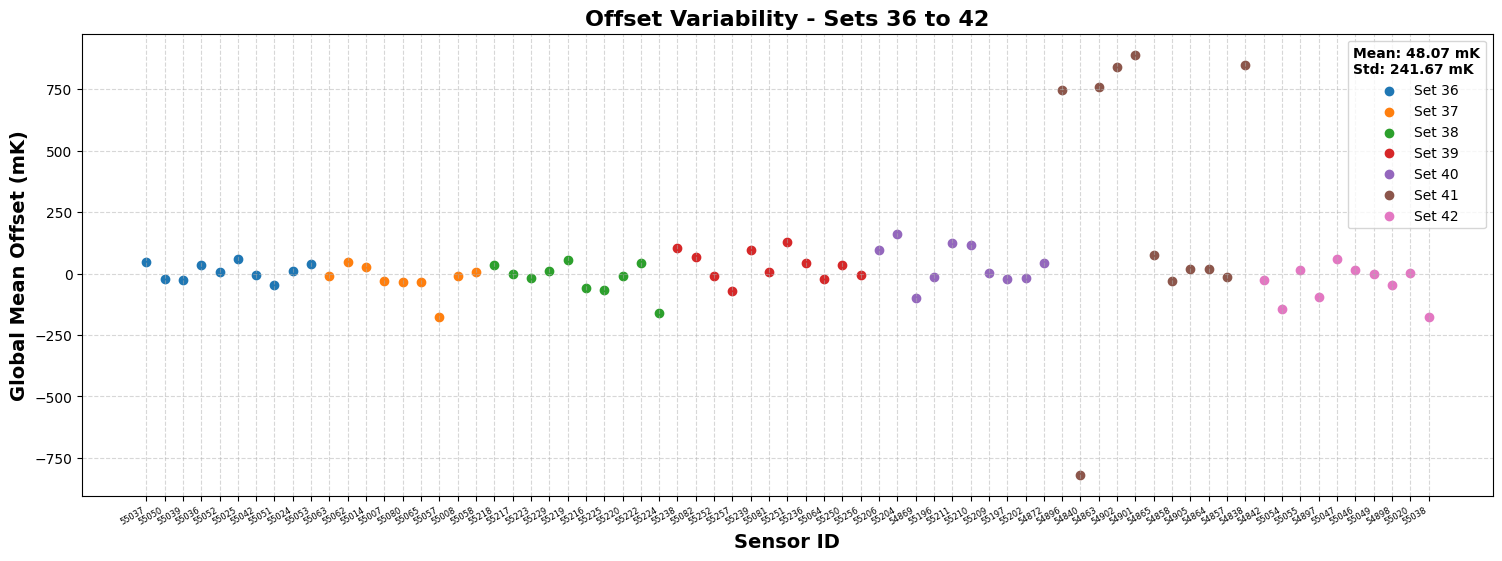

Set 43: len sensor_names=11, len global_means=11
  First sensor_name: '55021' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(-33.25490885784528) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 44: len sensor_names=11, len global_means=11
  First sensor_name: '54856' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(3.5940880454186144) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 45: len sensor_names=11, len global_means=11
  First sensor_name: '55056' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(-12.841195984016062) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Set 46: len sensor_names=10, len global_means=10
  First sensor_name: '48957' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(-593.6558416578946) (type: <class 'numpy.float64'>)
  All global_mean ty

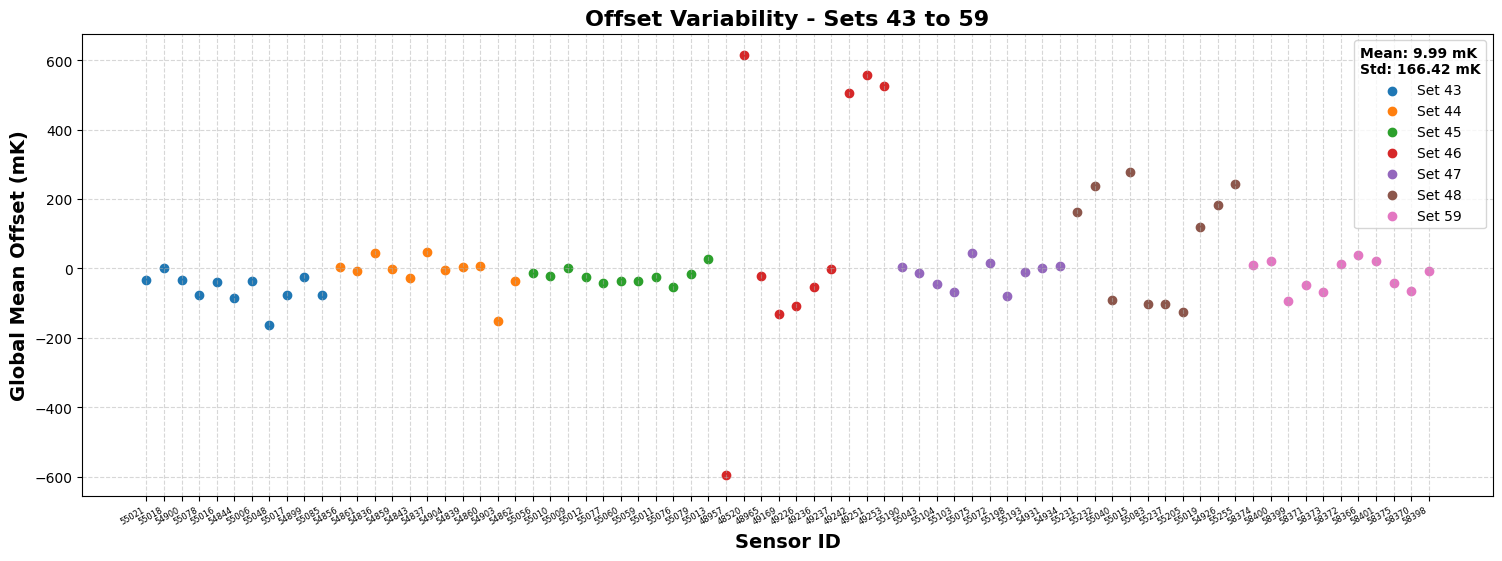

Set 60: len sensor_names=10, len global_means=10
  First sensor_name: '58385' (type: <class 'str'>)
  All sensor_name types: {'str'}
  First global_mean: np.float64(20.896729433684875) (type: <class 'numpy.float64'>)
  All global_mean types: {'float64'}
Plot saved to: plot_global_means/global_mean_offsets_part_8.png


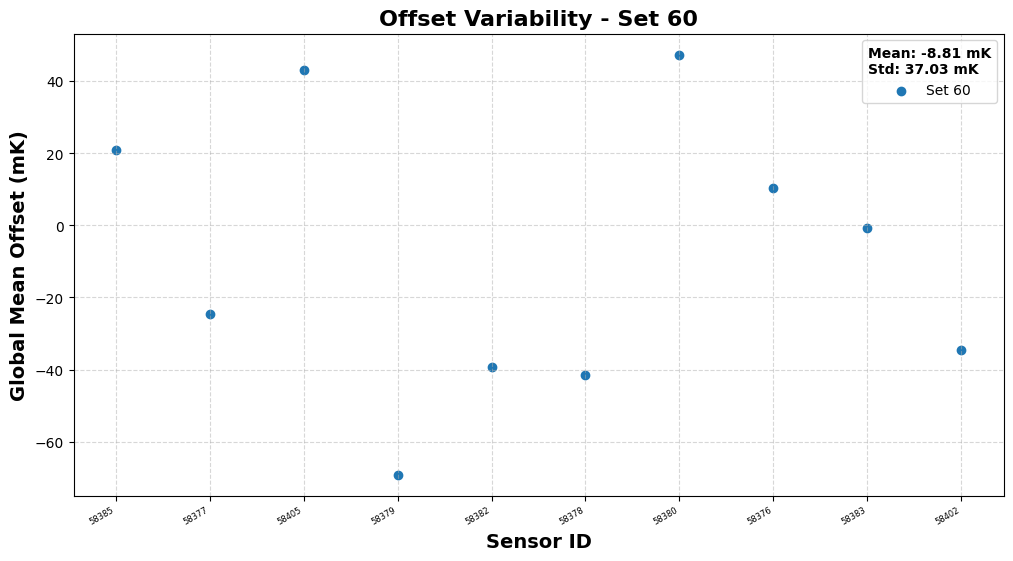

In [ ]:
# 9. Plot the global mean of offsets per sensor
#set_instance.plot_global_means(selected_sets=selected_sets)
# set_instance.plot_global_means()

Processing 50 sets.


/Users/vicky/Desktop/rtd-calibration-ana/RTD_Calibration_VGP/src/set.py:1555: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=legend_title, title_fontproperties={'weight': 'bold'}, loc='upper left')


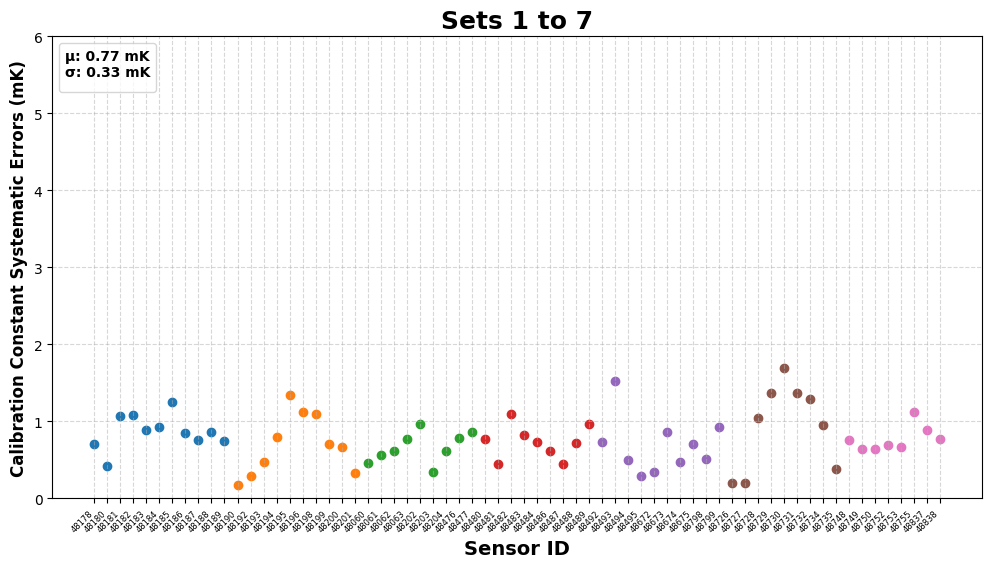

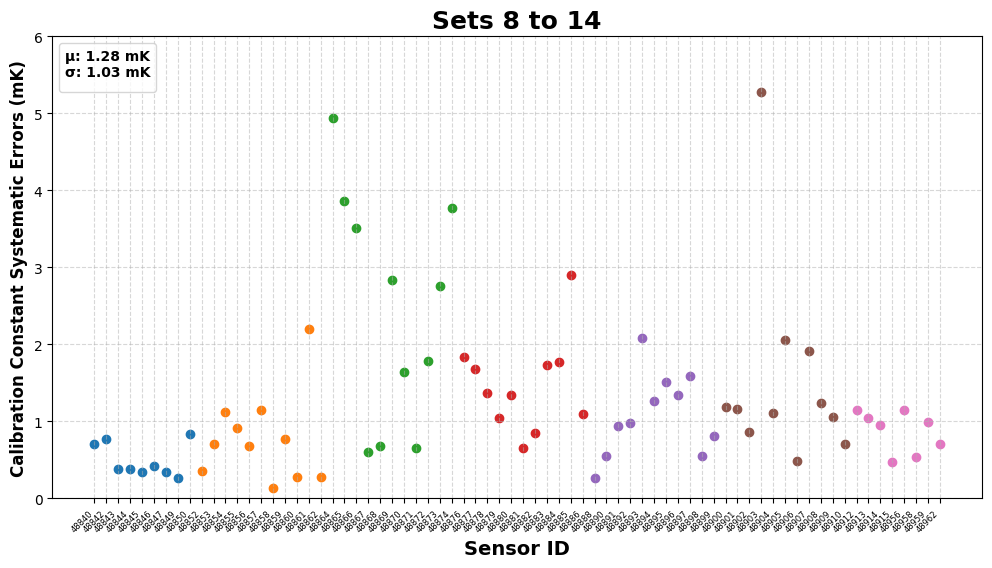

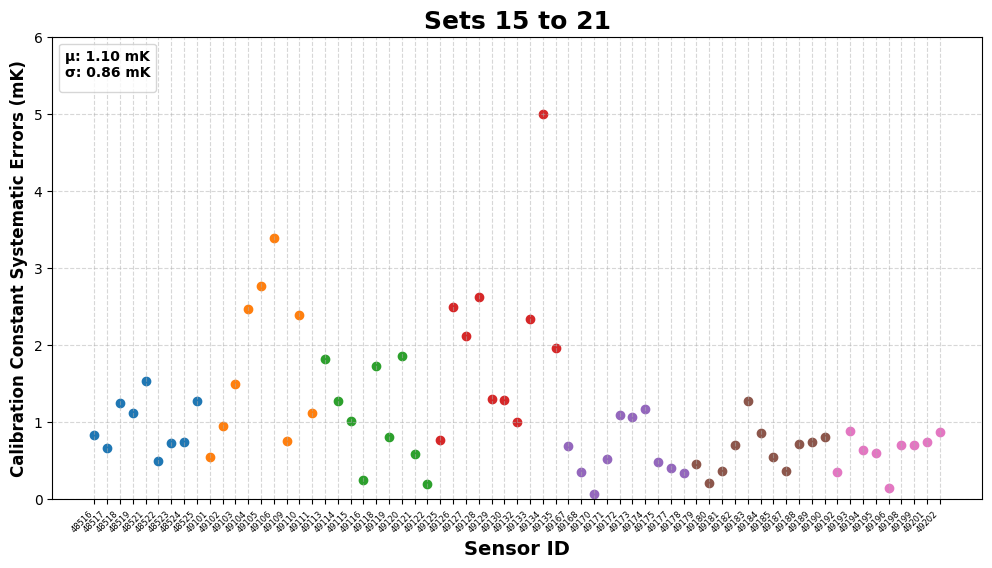

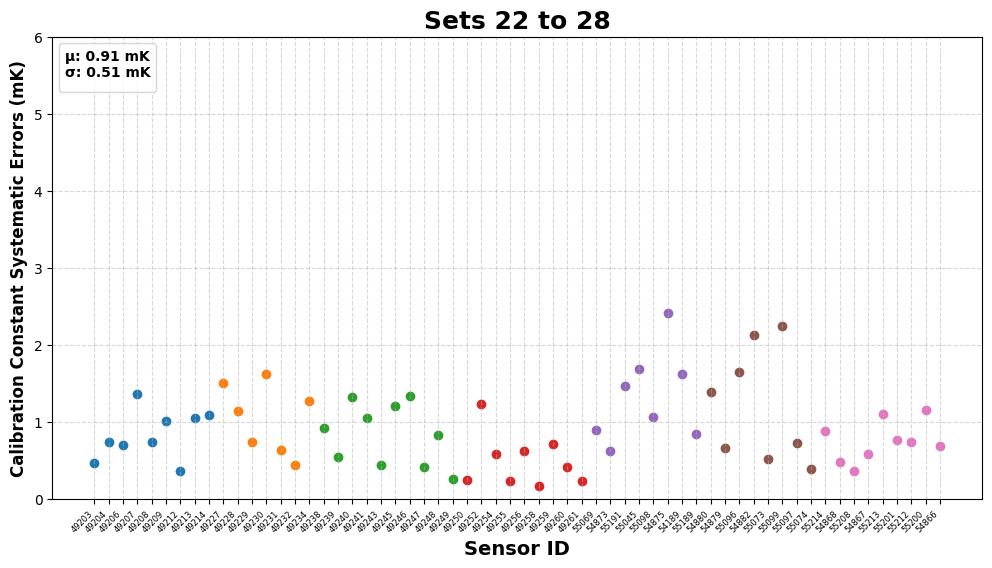

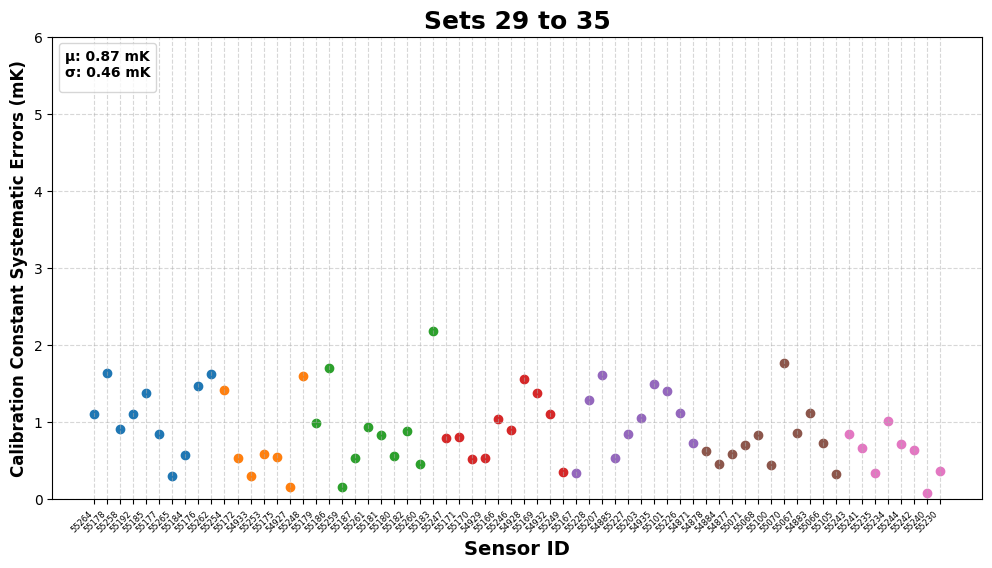

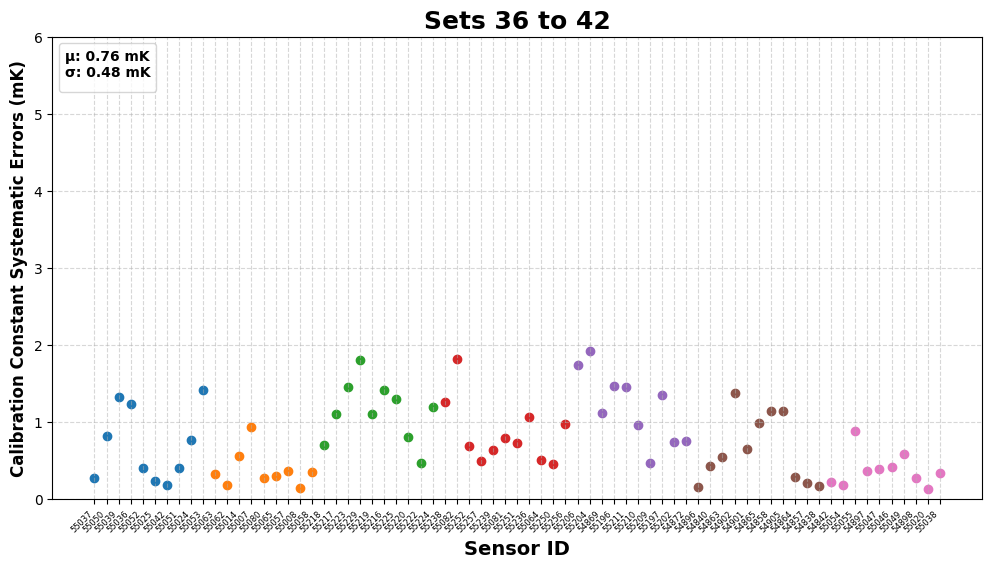

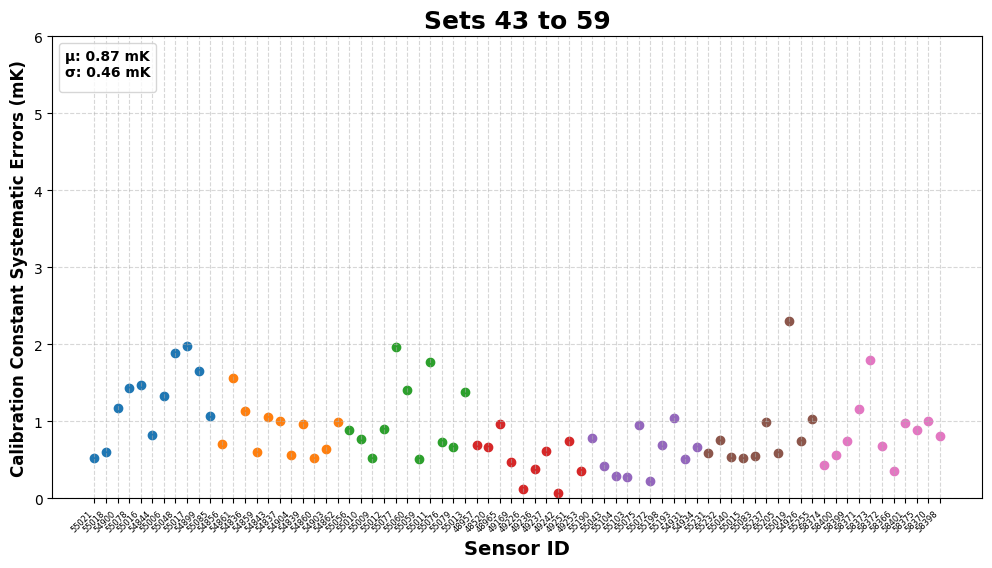

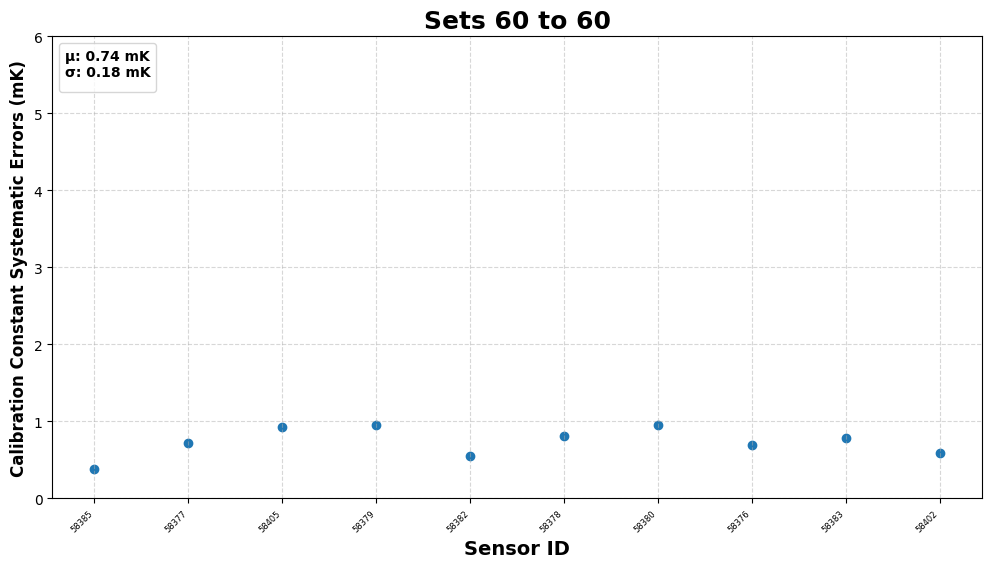

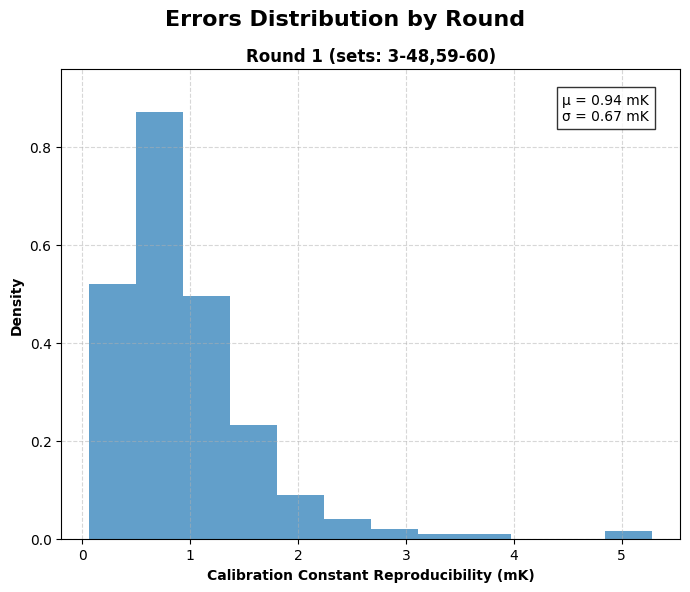

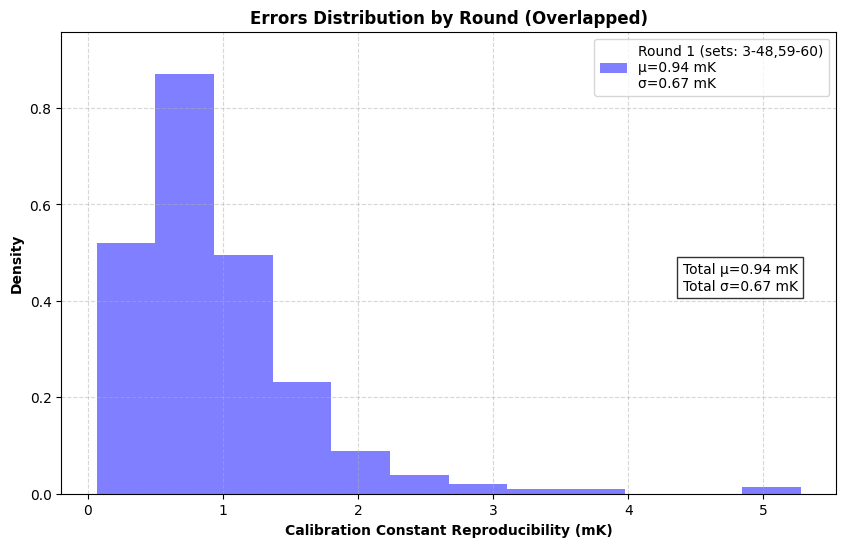

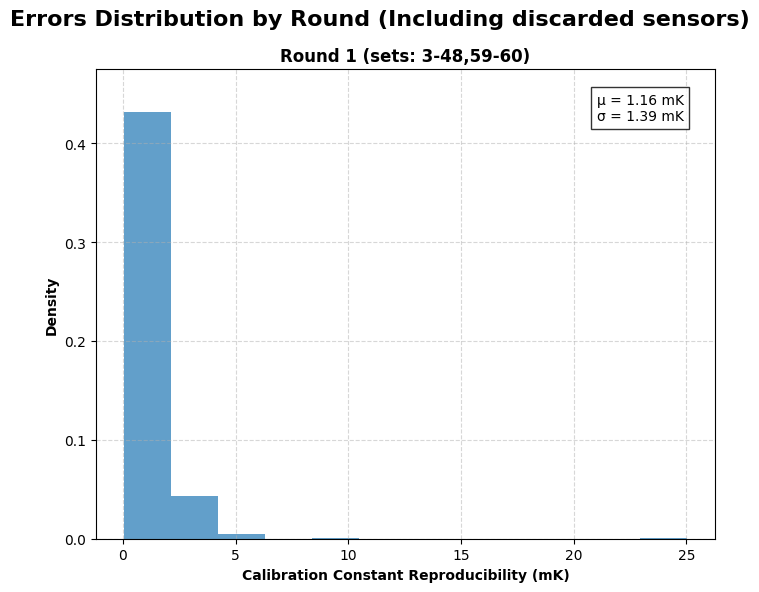

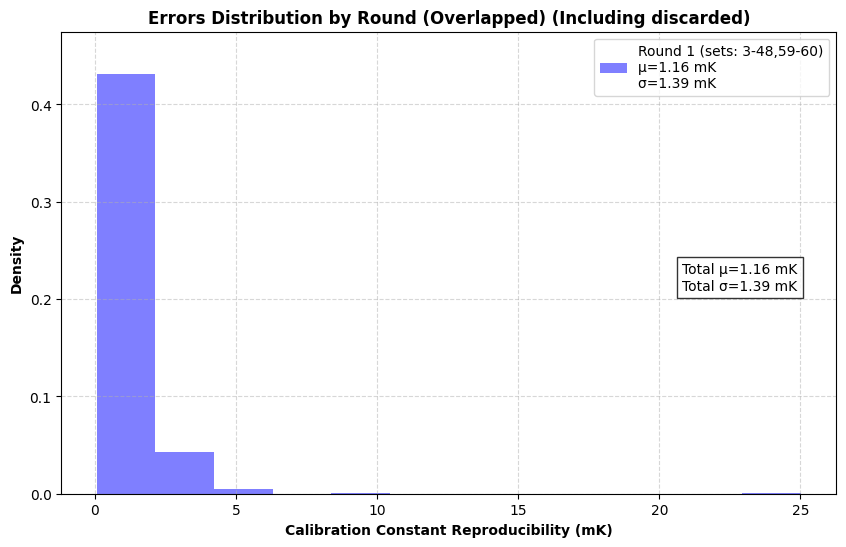

In [ ]:
# 10. Plot the global sigma of offsets per sensor
#set_instance.plot_global_sigmas(selected_sets=selected_sets)
# set_instance.plot_global_sigmas()